<a href="https://colab.research.google.com/github/ShaikhBorhanUddin/End-to-End-NLP-Pipeline-For-Human-vs-AI-Generated-Text-Classification-System/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df_combined_lemmatized = pd.read_csv('/content/drive/My Drive/Human vs AI Generated Text Classification/df_combined_lemmatized.csv')
df_combined = pd.read_csv('/content/drive/My Drive/Human vs AI Generated Text Classification/df_combined.csv')

In [3]:
import re
df_combined['length_words'] = df_combined['text'].apply(lambda x: len(re.findall(r'\b\w+\b', str(x))))

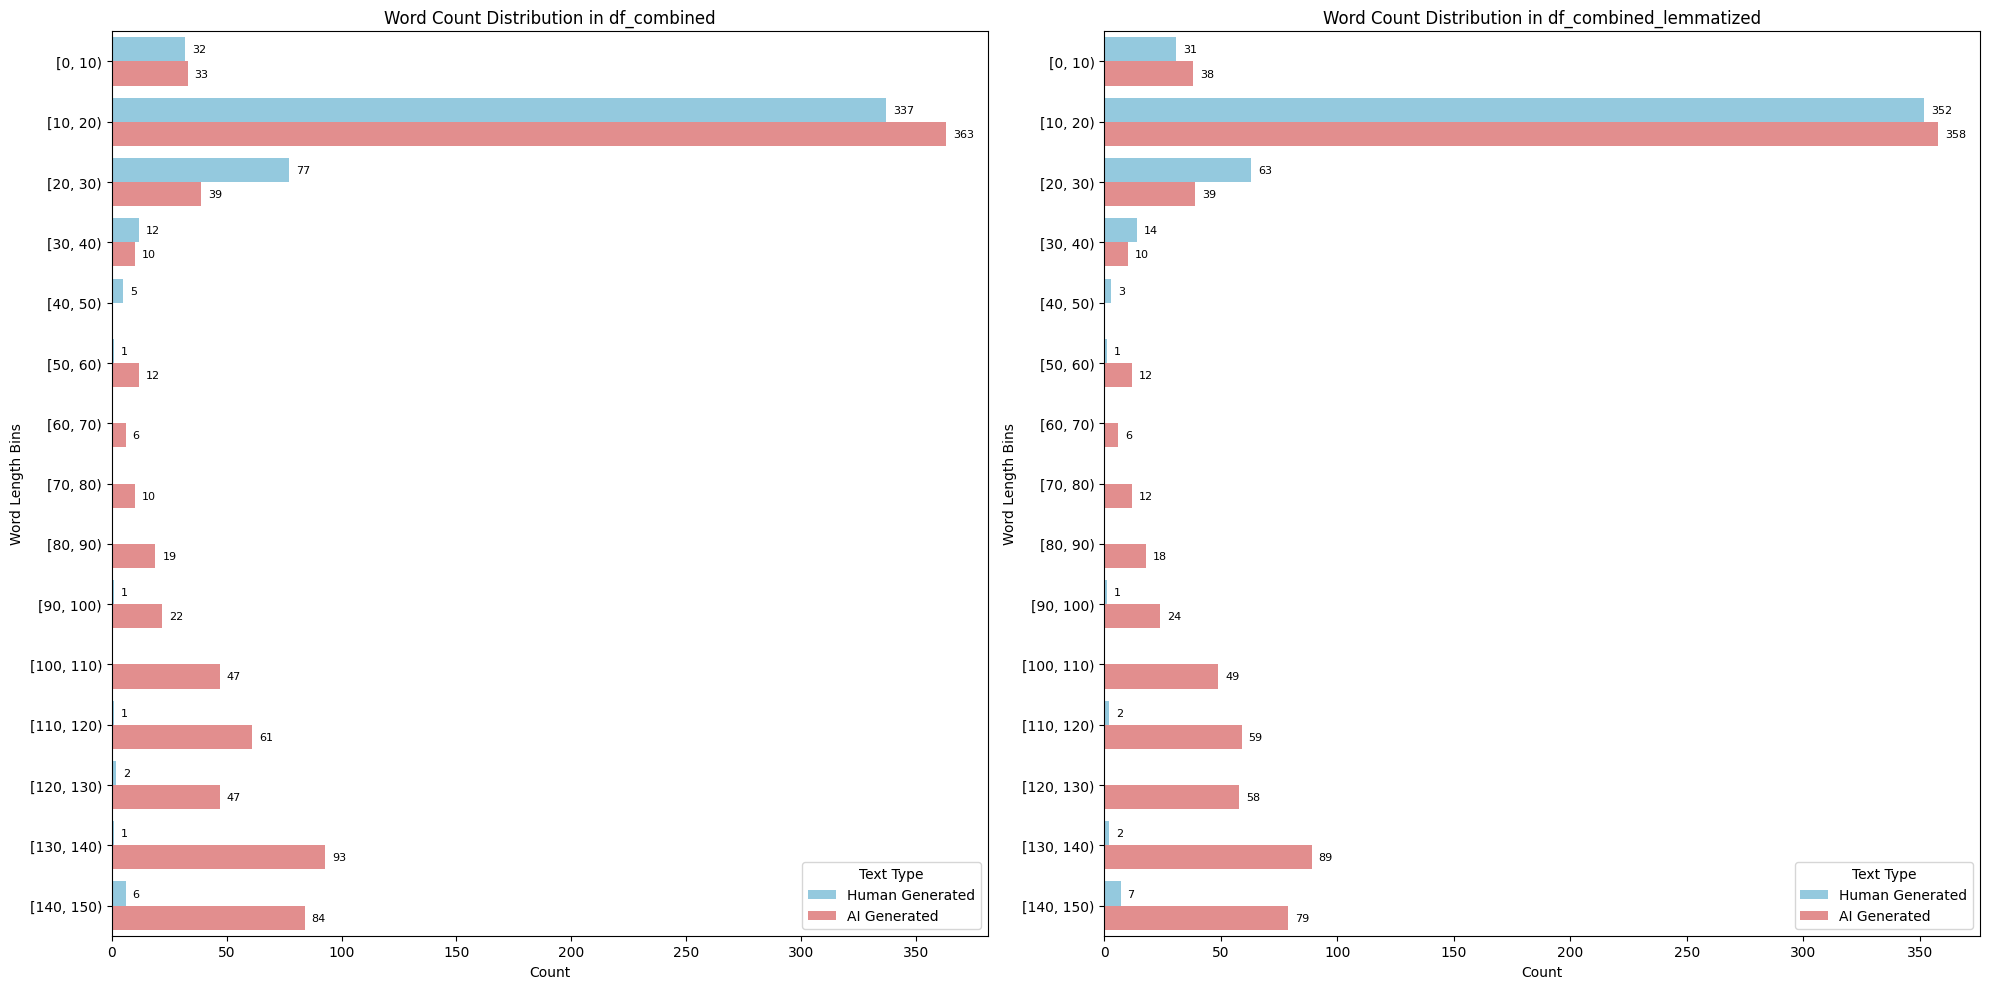

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

custom_bins_words = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

df_combined['length_words_binned'] = pd.cut(df_combined['length_words'], bins=custom_bins_words, right=False)
binned_words_combined_melted = df_combined.groupby(['length_words_binned', 'label'], observed=True).size().unstack(fill_value=0).stack().reset_index(name='count')
binned_words_combined_melted['length_words_binned'] = binned_words_combined_melted['length_words_binned'].astype(str)
binned_words_combined_melted['label'] = binned_words_combined_melted['label'].map({0: 'Human Generated', 1: 'AI Generated'})

ax0 = sns.barplot(y='length_words_binned', x='count', hue='label', data=binned_words_combined_melted,
                  palette={'Human Generated': 'skyblue', 'AI Generated': 'lightcoral'}, ax=axes[0])
axes[0].set_title('Word Count Distribution in df_combined')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word Length Bins')
axes[0].tick_params(axis='y', rotation=0)
axes[0].legend(title='Text Type')

for container in ax0.containers:
    for p in container.patches:
        if p.get_width() > 0:
            ax0.annotate(f'{int(p.get_width())}',
                        (p.get_width(), p.get_y() + p.get_height() / 2.),
                        ha='left', va='center',
                        xytext=(5, 0),
                        textcoords='offset points', fontsize=8)

df_combined_lemmatized['length_words_binned'] = pd.cut(df_combined_lemmatized['length_words'], bins=custom_bins_words, right=False)
binned_words_lemmatized_melted = df_combined_lemmatized.groupby(['length_words_binned', 'label'], observed=True).size().unstack(fill_value=0).stack().reset_index(name='count')
binned_words_lemmatized_melted['length_words_binned'] = binned_words_lemmatized_melted['length_words_binned'].astype(str)
binned_words_lemmatized_melted['label'] = binned_words_lemmatized_melted['label'].map({0: 'Human Generated', 1: 'AI Generated'})

ax1 = sns.barplot(y='length_words_binned', x='count', hue='label', data=binned_words_lemmatized_melted,
                  palette={'Human Generated': 'skyblue', 'AI Generated': 'lightcoral'}, ax=axes[1])
axes[1].set_title('Word Count Distribution in df_combined_lemmatized')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word Length Bins')
axes[1].tick_params(axis='y', rotation=0)
axes[1].legend(title='Text Type')

for container in ax1.containers:
    for p in container.patches:
        if p.get_width() > 0:
            ax1.annotate(f'{int(p.get_width())}',
                        (p.get_width(), p.get_y() + p.get_height() / 2.),
                        ha='left', va='center',
                        xytext=(5, 0),
                        textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))
print(f"Loaded {len(english_stopwords)} English stopwords.")

Loaded 198 English stopwords.


In [8]:
import nltk
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    text = str(text).lower()
    tokens = word_tokenize(text)
    preprocessed_tokens = [
        word for word in tokens
        if word.isalpha() and word not in english_stopwords and len(word) >= 2
    ]
    return preprocessed_tokens

print("Defined `preprocess_text` function for text cleaning.")

Defined `preprocess_text` function for text cleaning.


In [9]:
import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True)

df_combined['preprocessed_text'] = df_combined['text'].apply(preprocess_text)
df_combined_lemmatized['preprocessed_text'] = df_combined_lemmatized['text'].apply(preprocess_text)
print("Applied `preprocess_text` to 'text' column in both dataframes.")
print("Displaying the first 5 rows of df_combined with the new 'preprocessed_text' column:")
print(df_combined[['text', 'preprocessed_text']].head())
print("\nDisplaying the first 5 rows of df_combined_lemmatized with the new 'preprocessed_text' column:")
print(df_combined_lemmatized[['text', 'preprocessed_text']].head())

Applied `preprocess_text` to 'text' column in both dataframes.
Displaying the first 5 rows of df_combined with the new 'preprocessed_text' column:
                                                text  \
0  As someone who follows food, I believe privacy...   
1  Analysis indicates that travel is associated w...   
2  I recently experienced education in my day-to-...   
3  Analysis indicates that sports is associated w...   
4  In my experience, finance often leads to users...   

                                   preprocessed_text  
0  [someone, follows, food, believe, privacy, con...  
1  [analysis, indicates, travel, associated, priv...  
2  [recently, experienced, education, life, found...  
3  [analysis, indicates, sports, associated, cost...  
4  [experience, finance, often, leads, users, rep...  

Displaying the first 5 rows of df_combined_lemmatized with the new 'preprocessed_text' column:
                                                text  \
0  as someone who follow food , I 

In [10]:
df_human_combined = df_combined[df_combined['label'] == 0]
df_ai_combined = df_combined[df_combined['label'] == 1]
print("Filtered `df_combined` into `df_human_combined` and `df_ai_combined` based on label.")

Filtered `df_combined` into `df_human_combined` and `df_ai_combined` based on label.


In [11]:
from collections import Counter

human_words_combined = [word for sublist in df_human_combined['preprocessed_text'] for word in sublist]
ai_words_combined = [word for sublist in df_ai_combined['preprocessed_text'] for word in sublist]

human_freq_dist_combined = Counter(human_words_combined)
human_common_words_combined = human_freq_dist_combined.most_common(15)

ai_freq_dist_combined = Counter(ai_words_combined)
ai_common_words_combined = ai_freq_dist_combined.most_common(15)

print("15 Most Common Words in Human Generated Text (df_combined):")
for word, count in human_common_words_combined:
    print(f"- {word}: {count}")

print("\n15 Most Common Words in AI Generated Text (df_combined):")
for word, count in ai_common_words_combined:
    print(f"- {word}: {count}")

15 Most Common Words in Human Generated Text (df_combined):
- would: 24278
- people: 23976
- students: 21568
- school: 14233
- could: 12610
- car: 12323
- cars: 12320
- like: 11896
- get: 11847
- also: 11117
- one: 10695
- time: 10241
- electoral: 10039
- help: 9602
- many: 9473

15 Most Common Words in AI Generated Text (df_combined):
- students: 18222
- people: 14793
- also: 12650
- like: 10986
- electoral: 10749
- help: 10389
- college: 10065
- may: 9934
- important: 8661
- one: 8540
- time: 8506
- make: 8452
- car: 8108
- school: 7805
- would: 7389


In [12]:
from collections import Counter

df_human_lemmatized = df_combined_lemmatized[df_combined_lemmatized['label'] == 0]
df_ai_lemmatized = df_combined_lemmatized[df_combined_lemmatized['label'] == 1]

human_words_lemmatized = [word for sublist in df_human_lemmatized['preprocessed_text'] for word in sublist]
ai_words_lemmatized = [word for sublist in df_ai_lemmatized['preprocessed_text'] for word in sublist]

human_freq_dist_lemmatized = Counter(human_words_lemmatized)
human_common_words_lemmatized = human_freq_dist_lemmatized.most_common(15)

ai_freq_dist_lemmatized = Counter(ai_words_lemmatized)
ai_common_words_lemmatized = ai_freq_dist_lemmatized.most_common(15)

print("15 Most Common Words in Human Generated Text (df_combined_lemmatized):")
for word, count in human_common_words_lemmatized:
    print(f"- {word}: {count}")

print("\n15 Most Common Words in AI Generated Text (df_combined_lemmatized):")
for word, count in ai_common_words_lemmatized:
    print(f"- {word}: {count}")

15 Most Common Words in Human Generated Text (df_combined_lemmatized):
- student: 29302
- car: 24848
- would: 24670
- people: 24518
- get: 16766
- school: 16502
- make: 15657
- go: 14160
- vote: 13252
- could: 12622
- help: 12400
- like: 12274
- time: 12173
- one: 11424
- also: 11117

15 Most Common Words in AI Generated Text (df_combined_lemmatized):
- student: 22244
- car: 16485
- people: 14898
- make: 14393
- help: 13641
- also: 12650
- like: 11283
- electoral: 10760
- college: 10234
- may: 9942
- time: 9923
- work: 9501
- life: 9360
- school: 9137
- one: 9051


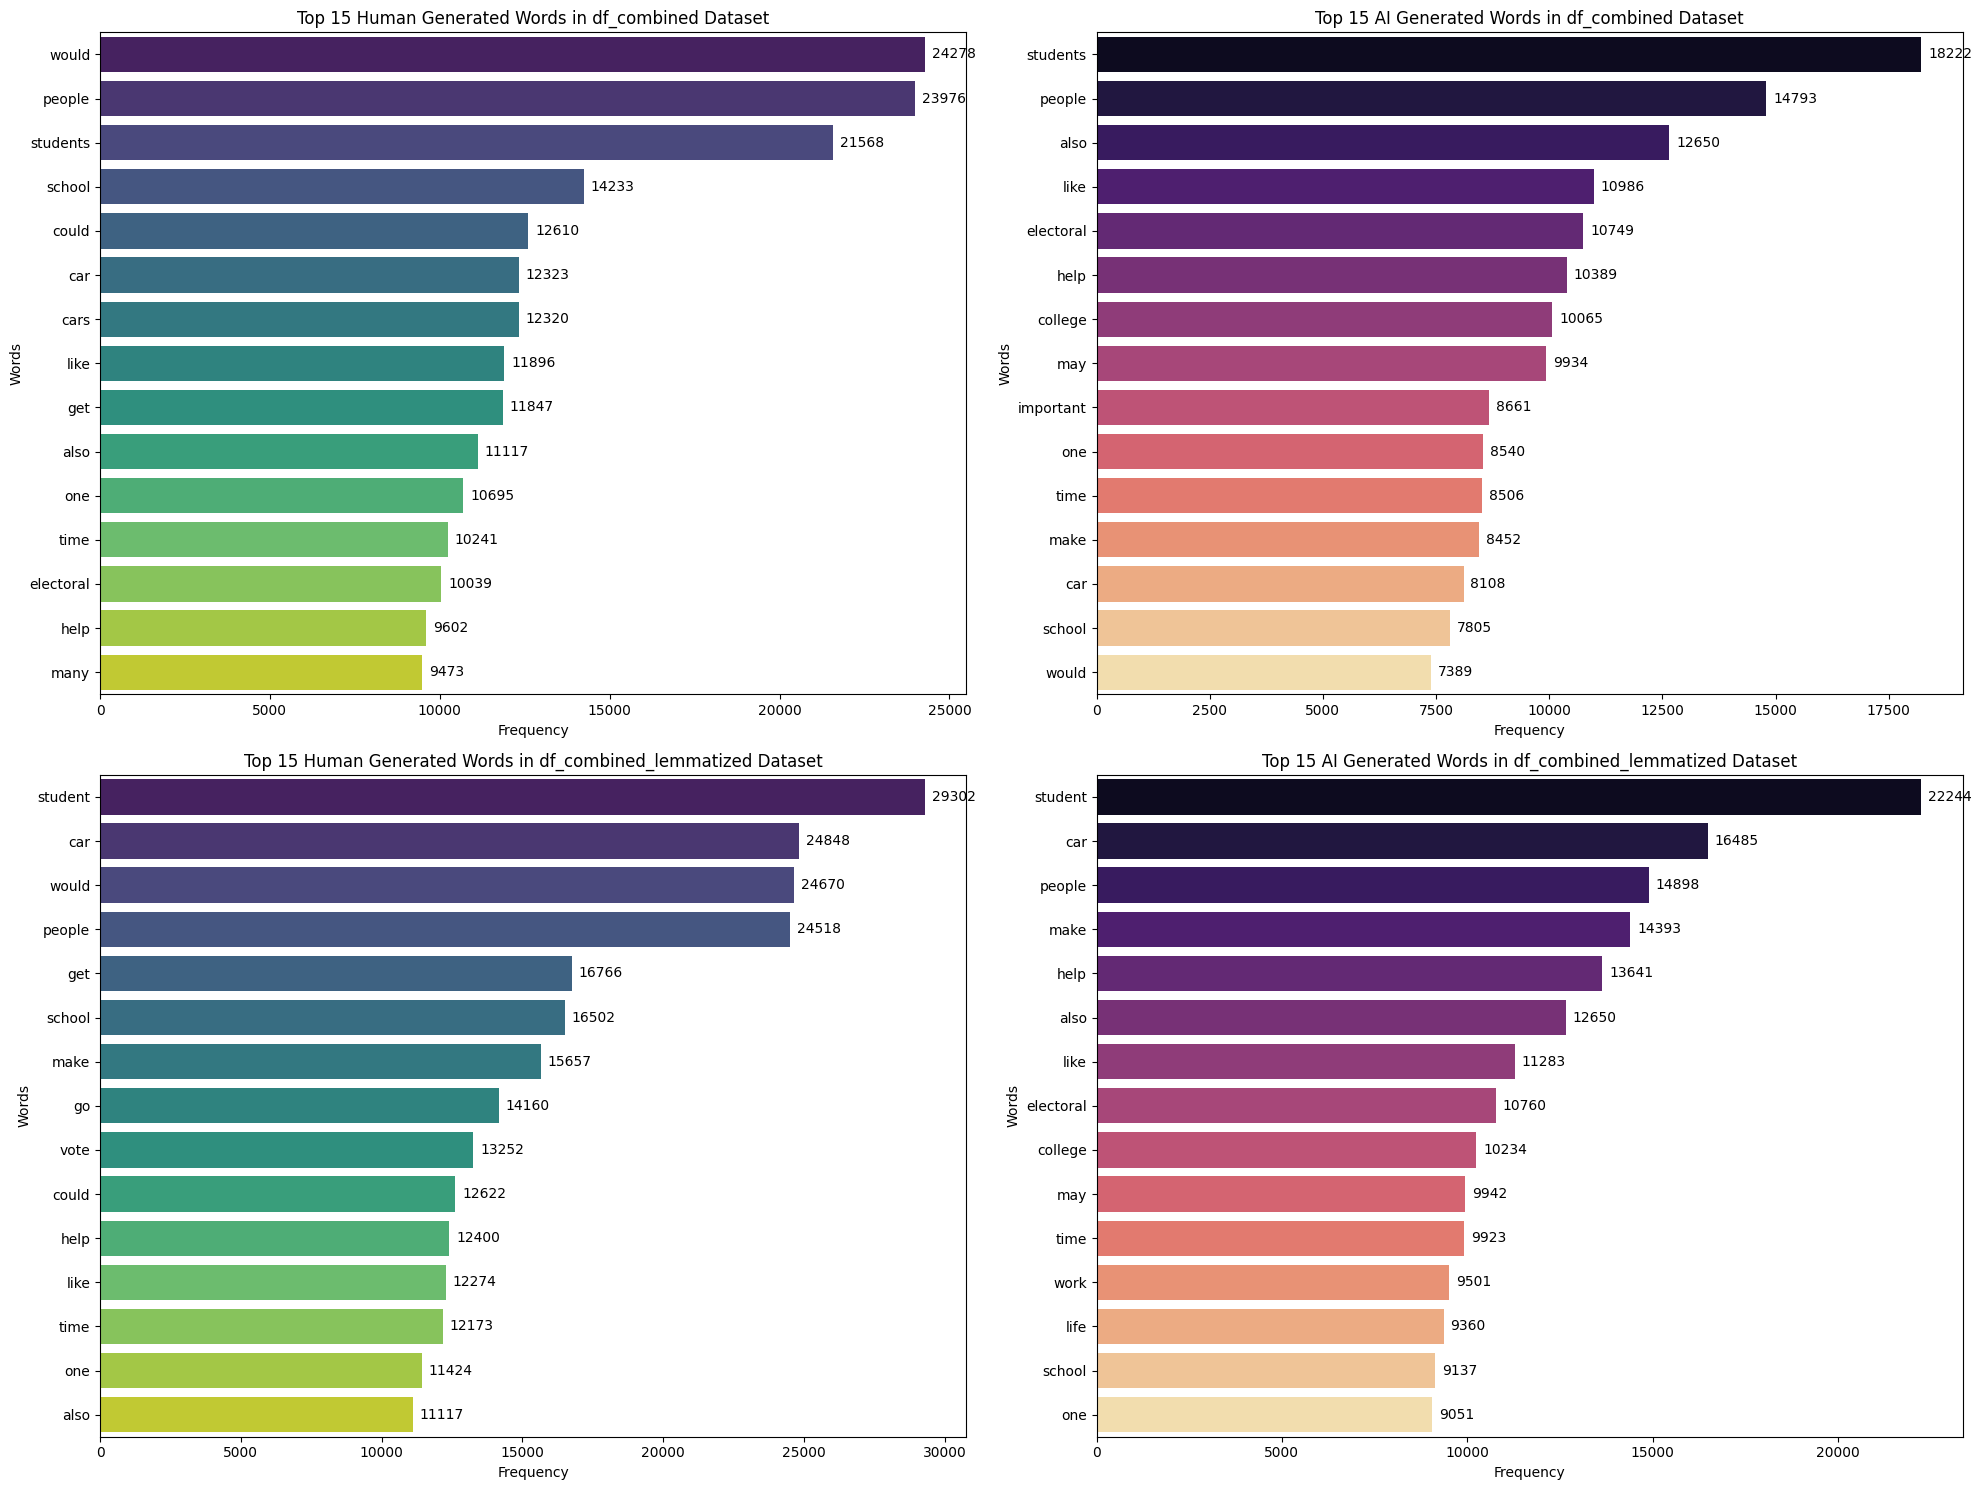

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert common word lists to DataFrames for plotting
df_human_combined_words = pd.DataFrame(human_common_words_combined, columns=['Word', 'Count'])
df_ai_combined_words = pd.DataFrame(ai_common_words_combined, columns=['Word', 'Count'])
df_human_lemmatized_words = pd.DataFrame(human_common_words_lemmatized, columns=['Word', 'Count'])
df_ai_lemmatized_words = pd.DataFrame(ai_common_words_lemmatized, columns=['Word', 'Count'])

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Plotting for df_combined (Human Generated)
ax0 = sns.barplot(x='Count', y='Word', data=df_human_combined_words, ax=axes[0, 0], palette='viridis', hue='Word', legend=False)
axes[0, 0].set_title('Top 15 Human Generated Words in df_combined Dataset')
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].set_ylabel('Words')
for p in ax0.patches:
    width = p.get_width()
    axes[0, 0].annotate(f'{int(width)}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Plotting for df_combined (AI Generated)
ax1 = sns.barplot(x='Count', y='Word', data=df_ai_combined_words, ax=axes[0, 1], palette='magma', hue='Word', legend=False)
axes[0, 1].set_title('Top 15 AI Generated Words in df_combined Dataset')
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Words')
for p in ax1.patches:
    width = p.get_width()
    axes[0, 1].annotate(f'{int(width)}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Plotting for df_combined_lemmatized (Human Generated)
ax2 = sns.barplot(x='Count', y='Word', data=df_human_lemmatized_words, ax=axes[1, 0], palette='viridis', hue='Word', legend=False)
axes[1, 0].set_title('Top 15 Human Generated Words in df_combined_lemmatized Dataset')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Words')
for p in ax2.patches:
    width = p.get_width()
    axes[1, 0].annotate(f'{int(width)}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Plotting for df_combined_lemmatized (AI Generated)
ax3 = sns.barplot(x='Count', y='Word', data=df_ai_lemmatized_words, ax=axes[1, 1], palette='magma', hue='Word', legend=False)
axes[1, 1].set_title('Top 15 AI Generated Words in df_combined_lemmatized Dataset')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_ylabel('Words')
for p in ax3.patches:
    width = p.get_width()
    axes[1, 1].annotate(f'{int(width)}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine preprocessed text for Word Clouds
human_text_combined = ' '.join([' '.join(tokens) for tokens in df_human_combined['preprocessed_text']])
ai_text_combined = ' '.join([' '.join(tokens) for tokens in df_ai_combined['preprocessed_text']])
human_text_lemmatized = ' '.join([' '.join(tokens) for tokens in df_human_lemmatized['preprocessed_text']])
ai_text_lemmatized = ' '.join([' '.join(tokens) for tokens in df_ai_lemmatized['preprocessed_text']])

print("Prepared text data for word cloud generation.")

Prepared text data for word cloud generation.


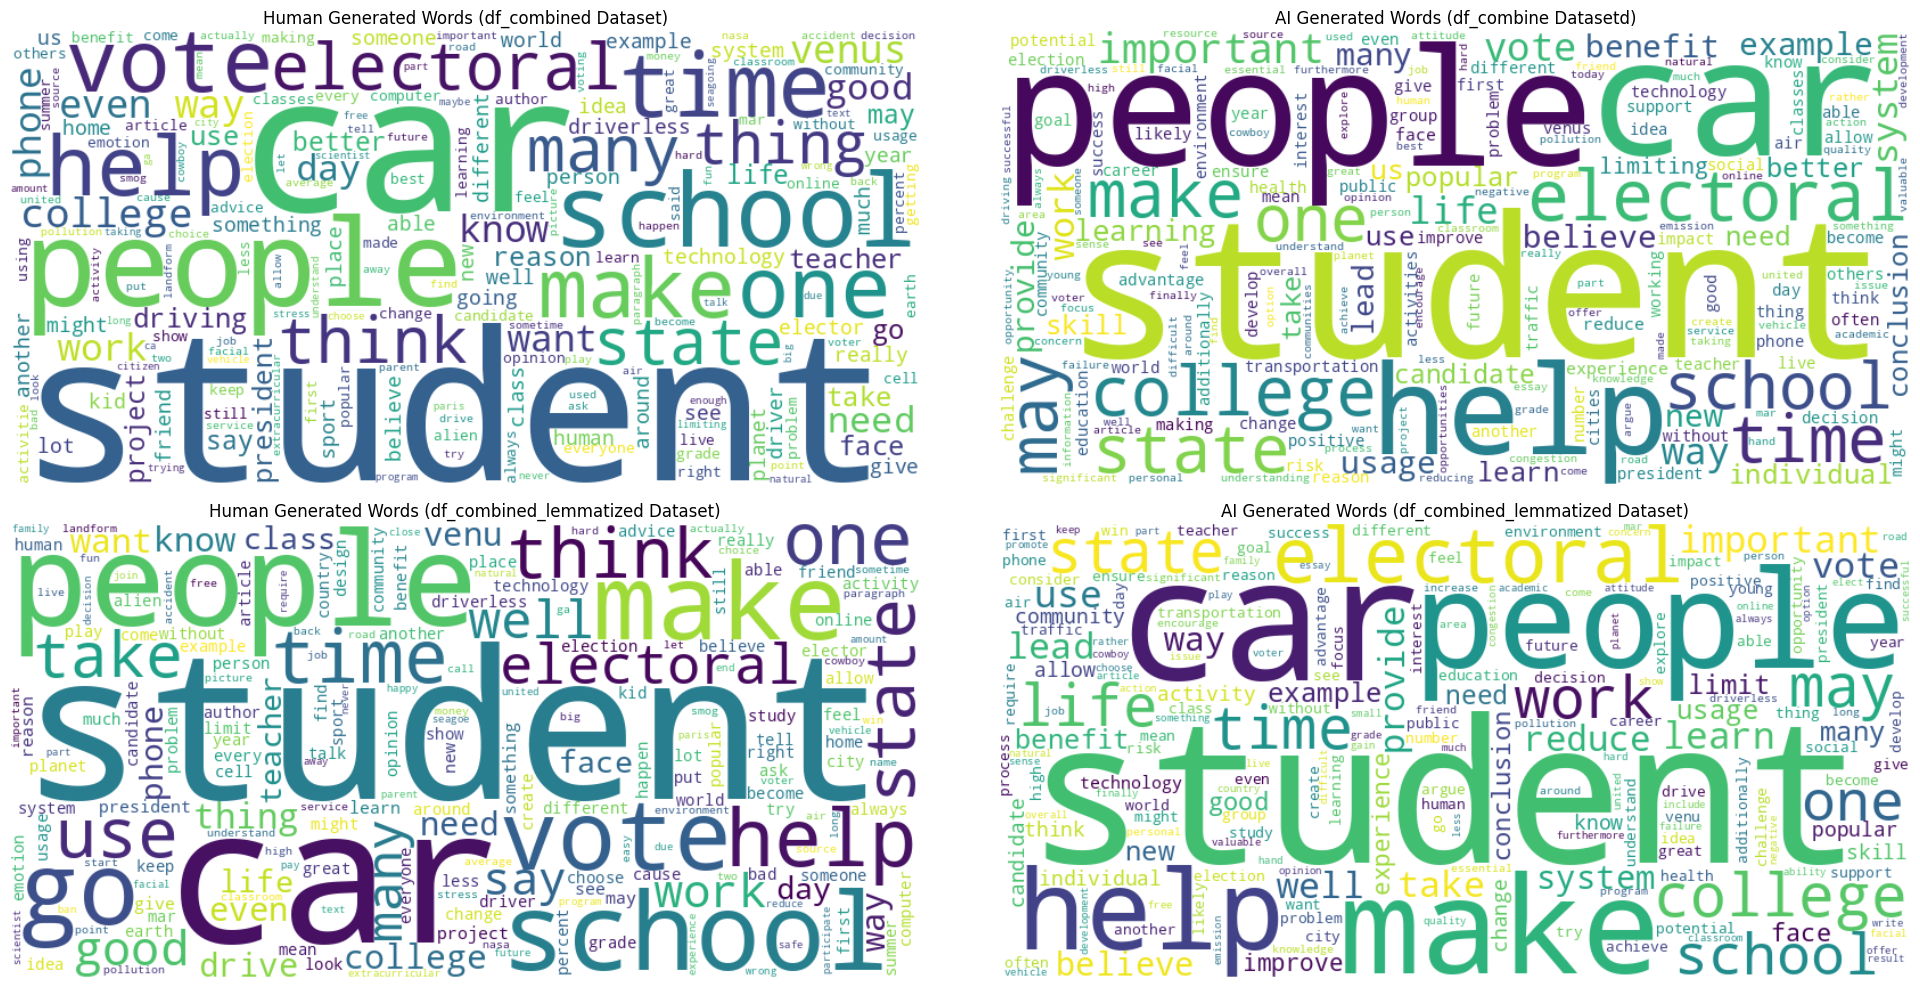

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

plt.subplot(2, 2, 1)
generate_wordcloud(human_text_combined, 'Human Generated Words (df_combined Dataset)')

plt.subplot(2, 2, 2)
generate_wordcloud(ai_text_combined, 'AI Generated Words (df_combine Datasetd)')

plt.subplot(2, 2, 3)
generate_wordcloud(human_text_lemmatized, 'Human Generated Words (df_combined_lemmatized Dataset)')

plt.subplot(2, 2, 4)
generate_wordcloud(ai_text_lemmatized, 'AI Generated Words (df_combined_lemmatized Dataset)')

plt.tight_layout()
plt.show()


Trigram (three-word) N-gram analysis is generally more computationally expensive than bigram analysis because the number of possible word combinations grows rapidly as N increases. This leads to significantly higher storage requirements, since a large text corpus produces far more unique trigrams that must be stored along with their frequencies, increasing memory usage and making data structures more complex to manage. In addition, processing costs rise because generating trigrams requires more operations during text scanning, and subsequent tasks such as probability calculation, smoothing, or sequence searching must be performed over a much larger dataset, resulting in slower execution times. For these reasons, N-gram analysis in this project is limited to bigrams to balance computational efficiency and analytical effectiveness.

In [16]:
from nltk.util import ngrams

def generate_bigrams(tokens):
    """Generates bigrams from a list of tokens."""
    if not tokens or len(tokens) < 2:
        return []
    return list(ngrams(tokens, 2))

# Generate bigrams for df_combined
human_bigrams_combined = [bigram for sublist in df_human_combined['preprocessed_text'].apply(generate_bigrams) for bigram in sublist]
ai_bigrams_combined = [bigram for sublist in df_ai_combined['preprocessed_text'].apply(generate_bigrams) for bigram in sublist]

# Generate bigrams for df_combined_lemmatized
human_bigrams_lemmatized = [bigram for sublist in df_human_lemmatized['preprocessed_text'].apply(generate_bigrams) for bigram in sublist]
ai_bigrams_lemmatized = [bigram for sublist in df_ai_lemmatized['preprocessed_text'].apply(generate_bigrams) for bigram in sublist]

print(f"Generated {len(human_bigrams_combined)} human-generated bigrams from df_combined.")
print(f"Generated {len(ai_bigrams_combined)} AI-generated bigrams from df_combined.")
print(f"Generated {len(human_bigrams_lemmatized)} human-generated bigrams from df_combined_lemmatized.")
print(f"Generated {len(ai_bigrams_lemmatized)} AI-generated bigrams from df_combined_lemmatized.")

print("First 5 human-generated bigrams (original text):", human_bigrams_combined[:5])
print("First 5 AI-generated bigrams (original text):", ai_bigrams_combined[:5])
print("First 5 human-generated bigrams (lemmatized text):", human_bigrams_lemmatized[:5])
print("First 5 AI-generated bigrams (lemmatized text):", ai_bigrams_lemmatized[:5])

Generated 1742451 human-generated bigrams from df_combined.
Generated 1789006 AI-generated bigrams from df_combined.
Generated 1741416 human-generated bigrams from df_combined_lemmatized.
Generated 1793782 AI-generated bigrams from df_combined_lemmatized.
First 5 human-generated bigrams (original text): [('someone', 'follows'), ('follows', 'food'), ('food', 'believe'), ('believe', 'privacy'), ('privacy', 'concerns')]
First 5 AI-generated bigrams (original text): [('analysis', 'indicates'), ('indicates', 'travel'), ('travel', 'associated'), ('associated', 'privacy'), ('privacy', 'concerns')]
First 5 human-generated bigrams (lemmatized text): [('someone', 'follow'), ('follow', 'food'), ('food', 'believe'), ('believe', 'privacy'), ('privacy', 'concern')]
First 5 AI-generated bigrams (lemmatized text): [('analysis', 'indicate'), ('indicate', 'travel'), ('travel', 'associate'), ('associate', 'privacy'), ('privacy', 'concern')]


In [17]:
from collections import Counter

# Calculate frequency distribution for each bigram list
human_bigram_freq_combined = Counter(human_bigrams_combined)
ai_bigram_freq_combined = Counter(ai_bigrams_combined)
human_bigram_freq_lemmatized = Counter(human_bigrams_lemmatized)
ai_bigram_freq_lemmatized = Counter(ai_bigrams_lemmatized)

# Get the 15 most common bigrams for each category
human_common_bigrams_combined = human_bigram_freq_combined.most_common(15)
ai_common_bigrams_combined = ai_bigram_freq_combined.most_common(15)
human_common_bigrams_lemmatized = human_bigram_freq_lemmatized.most_common(15)
ai_common_bigrams_lemmatized = ai_bigram_freq_lemmatized.most_common(15)

print("Top 15 Human Generated Bigrams (Original Text):")
for bigram, count in human_common_bigrams_combined:
    print(f"- {bigram}: {count}")

print("\nTop 15 AI Generated Bigrams (Original Text):")
for bigram, count in ai_common_bigrams_combined:
    print(f"- {bigram}: {count}")

print("\nTop 15 Human Generated Bigrams (Lemmatized Text):")
for bigram, count in human_common_bigrams_lemmatized:
    print(f"- {bigram}: {count}")

print("\nTop 15 AI Generated Bigrams (Lemmatized Text):")
for bigram, count in ai_common_bigrams_lemmatized:
    print(f"- {bigram}: {count}")

Top 15 Human Generated Bigrams (Original Text):
- ('electoral', 'college'): 7818
- ('driverless', 'cars'): 2374
- ('popular', 'vote'): 2115
- ('car', 'usage'): 1963
- ('community', 'service'): 1815
- ('united', 'states'): 1745
- ('many', 'people'): 1579
- ('cell', 'phones'): 1444
- ('limiting', 'car'): 1269
- ('students', 'would'): 1235
- ('face', 'mars'): 1193
- ('natural', 'landform'): 1167
- ('vote', 'president'): 1143
- ('electoral', 'votes'): 1010
- ('cell', 'phone'): 965

Top 15 AI Generated Bigrams (Original Text):
- ('electoral', 'college'): 8716
- ('car', 'usage'): 5462
- ('limiting', 'car'): 3962
- ('popular', 'vote'): 3688
- ('driverless', 'cars'): 2065
- ('traffic', 'congestion'): 1748
- ('united', 'states'): 1735
- ('public', 'transportation'): 1718
- ('air', 'pollution'): 1391
- ('high', 'school'): 1378
- ('face', 'mars'): 1305
- ('electoral', 'votes'): 1295
- ('positive', 'attitude'): 1288
- ('young', 'people'): 1227
- ('climate', 'change'): 1220

Top 15 Human Generated 

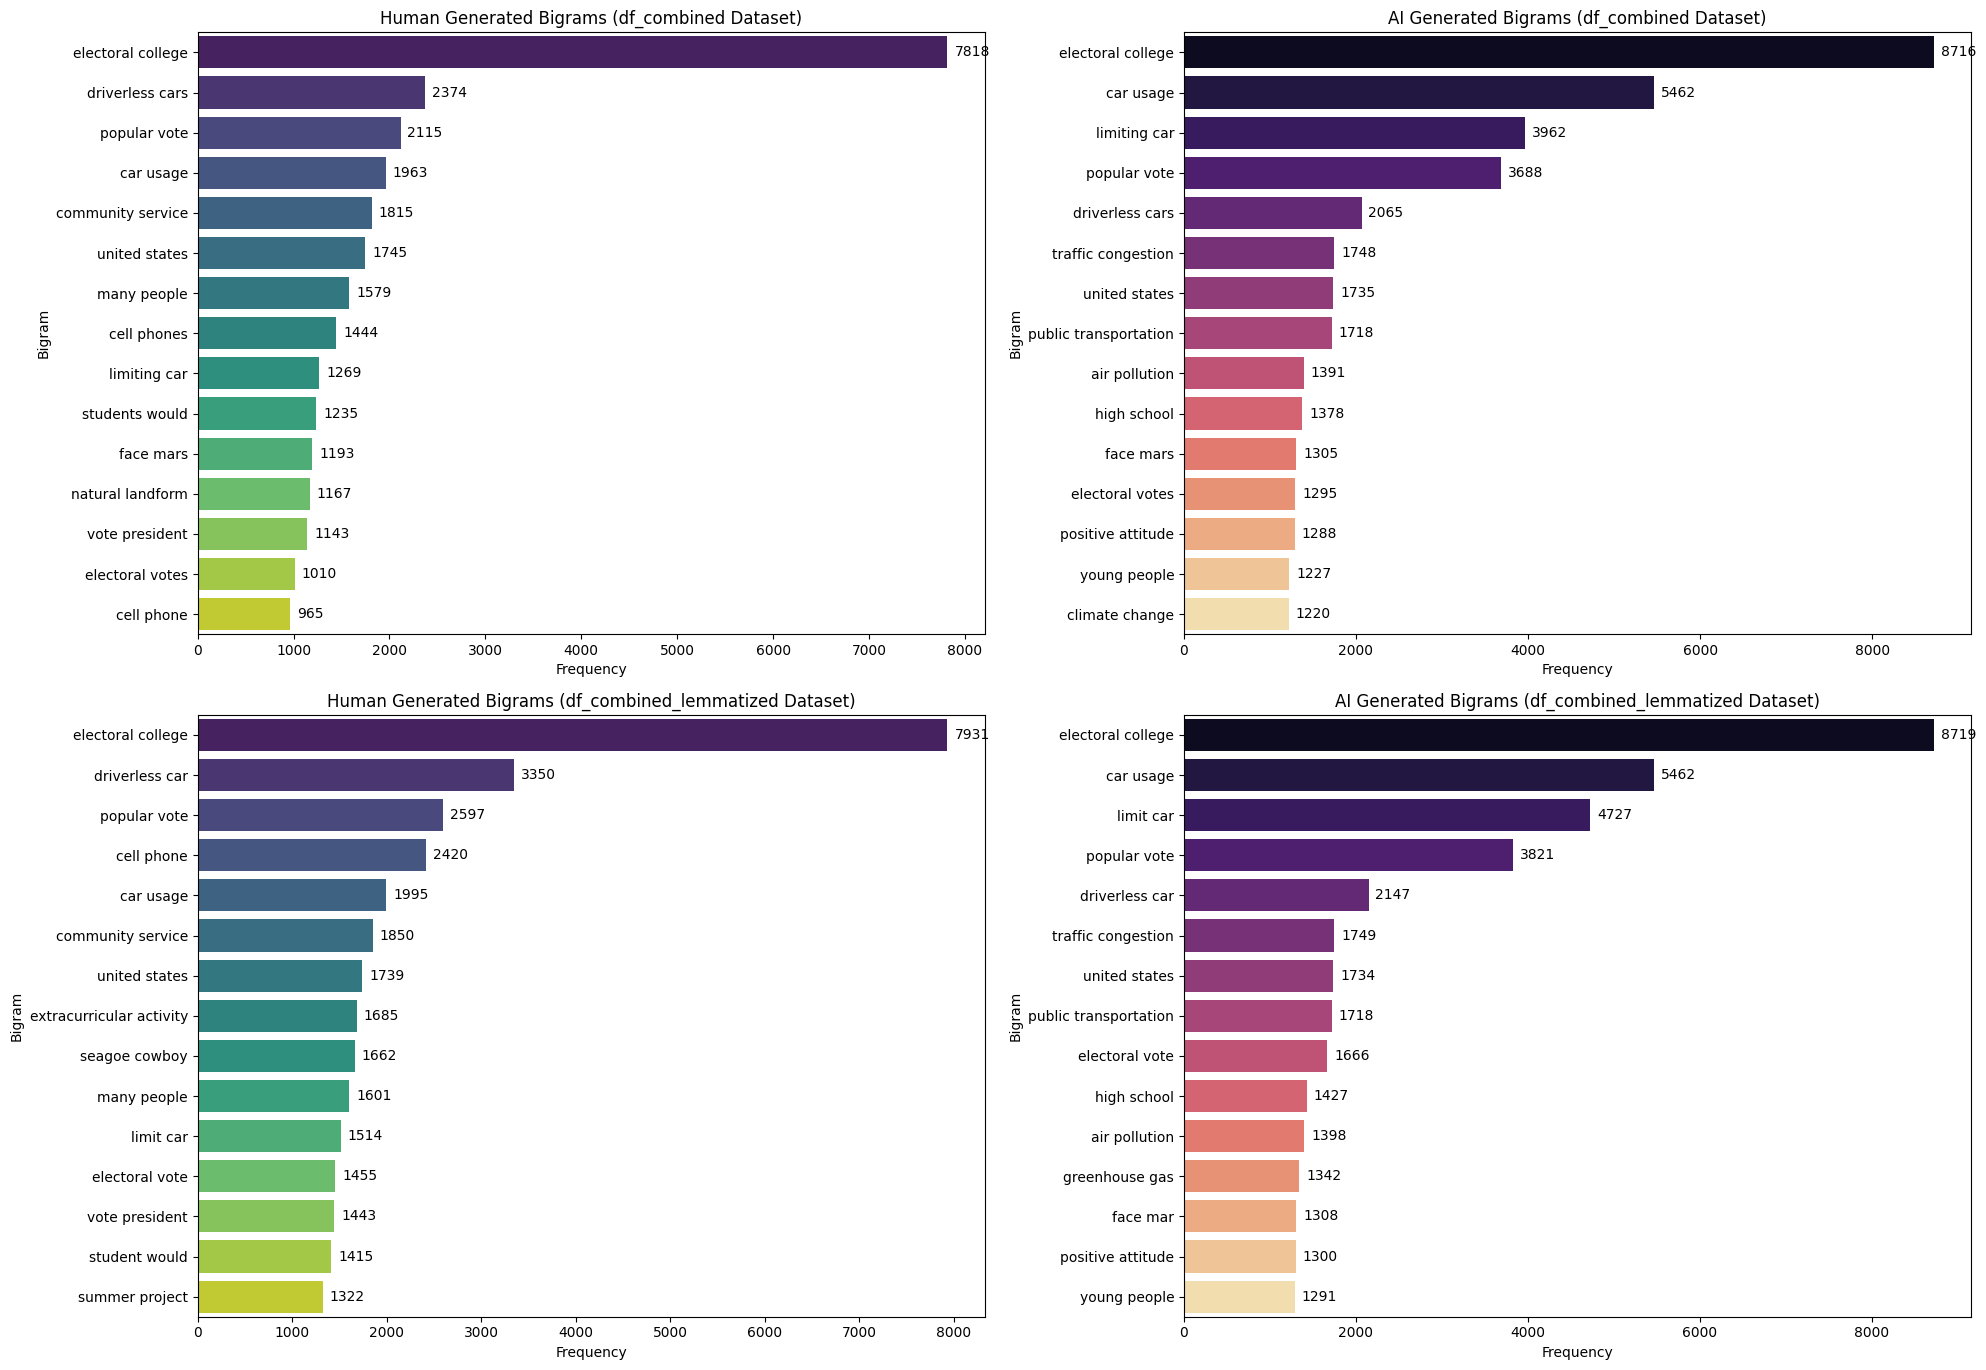

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_human_common_bigrams_combined = pd.DataFrame([(' '.join(b), c) for b, c in human_common_bigrams_combined], columns=['Bigram', 'Count'])
df_ai_common_bigrams_combined = pd.DataFrame([(' '.join(b), c) for b, c in ai_common_bigrams_combined], columns=['Bigram', 'Count'])
df_human_common_bigrams_lemmatized = pd.DataFrame([(' '.join(b), c) for b, c in human_common_bigrams_lemmatized], columns=['Bigram', 'Count'])
df_ai_common_bigrams_lemmatized = pd.DataFrame([(' '.join(b), c) for b, c in ai_common_bigrams_lemmatized], columns=['Bigram', 'Count'])

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Plotting for df_combined (Human Generated)
ax0 = sns.barplot(x='Count', y='Bigram', data=df_human_common_bigrams_combined, ax=axes[0, 0], palette='viridis', hue='Bigram', legend=False)
axes[0, 0].set_title('Human Generated Bigrams (df_combined Dataset)')
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].set_ylabel('Bigram')
for p in ax0.patches:
    width = p.get_width()
    axes[0, 0].annotate(f'{int(width)}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Plotting for df_combined (AI Generated)
ax1 = sns.barplot(x='Count', y='Bigram', data=df_ai_common_bigrams_combined, ax=axes[0, 1], palette='magma', hue='Bigram', legend=False)
axes[0, 1].set_title('AI Generated Bigrams (df_combined Dataset)')
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Bigram')
for p in ax1.patches:
    width = p.get_width()
    axes[0, 1].annotate(f'{int(width)}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Plotting for df_combined_lemmatized (Human Generated)
ax2 = sns.barplot(x='Count', y='Bigram', data=df_human_common_bigrams_lemmatized, ax=axes[1, 0], palette='viridis', hue='Bigram', legend=False)
axes[1, 0].set_title('Human Generated Bigrams (df_combined_lemmatized Dataset)')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Bigram')
for p in ax2.patches:
    width = p.get_width()
    axes[1, 0].annotate(f'{int(width)}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Plotting for df_combined_lemmatized (AI Generated)
ax3 = sns.barplot(x='Count', y='Bigram', data=df_ai_common_bigrams_lemmatized, ax=axes[1, 1], palette='magma', hue='Bigram', legend=False)
axes[1, 1].set_title('AI Generated Bigrams (df_combined_lemmatized Dataset)')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_ylabel('Bigram')
for p in ax3.patches:
    width = p.get_width()
    axes[1, 1].annotate(f'{int(width)}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [20]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.6/176.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.1 MB/s eta 0:00:00


In [21]:
import sys
!{sys.executable} -m pip install textstat

In [22]:
import textstat

def calculate_flesch_score(text):
    """Calculates the Flesch Reading Ease score for a given text."""
    # textstat.flesch_reading_ease expects a string input
    return textstat.flesch_reading_ease(str(text))

# Create explicit copies to avoid SettingWithCopyWarning
df_human_combined = df_combined[df_combined['label'] == 0].copy()
df_ai_combined = df_combined[df_combined['label'] == 1].copy()
df_human_lemmatized = df_combined_lemmatized[df_combined_lemmatized['label'] == 0].copy()
df_ai_lemmatized = df_combined_lemmatized[df_combined_lemmatized['label'] == 1].copy()

# Apply the function to df_human_combined
df_human_combined['flesch_score'] = df_human_combined['text'].apply(calculate_flesch_score)

# Apply the function to df_ai_combined
df_ai_combined['flesch_score'] = df_ai_combined['text'].apply(calculate_flesch_score)

# Apply the function to df_human_lemmatized
df_human_lemmatized['flesch_score'] = df_human_lemmatized['text'].apply(calculate_flesch_score)

# Apply the function to df_ai_lemmatized
df_ai_lemmatized['flesch_score'] = df_ai_lemmatized['text'].apply(calculate_flesch_score)

# Calculate average Flesch Reading Ease scores
avg_flesch_human_combined = df_human_combined['flesch_score'].mean()
avg_flesch_ai_combined = df_ai_combined['flesch_score'].mean()
avg_flesch_human_lemmatized = df_human_lemmatized['flesch_score'].mean()
avg_flesch_ai_lemmatized = df_ai_lemmatized['flesch_score'].mean()

# Print the results
print(f"Average Flesch Reading Ease Score (Human Generated, Original Text): {avg_flesch_human_combined:.2f}")
print(f"Average Flesch Reading Ease Score (AI Generated, Original Text): {avg_flesch_ai_combined:.2f}")
print(f"Average Flesch Reading Ease Score (Human Generated, Lemmatized Text): {avg_flesch_human_lemmatized:.2f}")
print(f"Average Flesch Reading Ease Score (AI Generated, Lemmatized Text): {avg_flesch_ai_lemmatized:.2f}")

print("Flesch Reading Ease scores calculated and averages displayed for all categories.")

Average Flesch Reading Ease Score (Human Generated, Original Text): 62.45
Average Flesch Reading Ease Score (AI Generated, Original Text): 46.05
Average Flesch Reading Ease Score (Human Generated, Lemmatized Text): 66.80
Average Flesch Reading Ease Score (AI Generated, Lemmatized Text): 51.17
Flesch Reading Ease scores calculated and averages displayed for all categories.


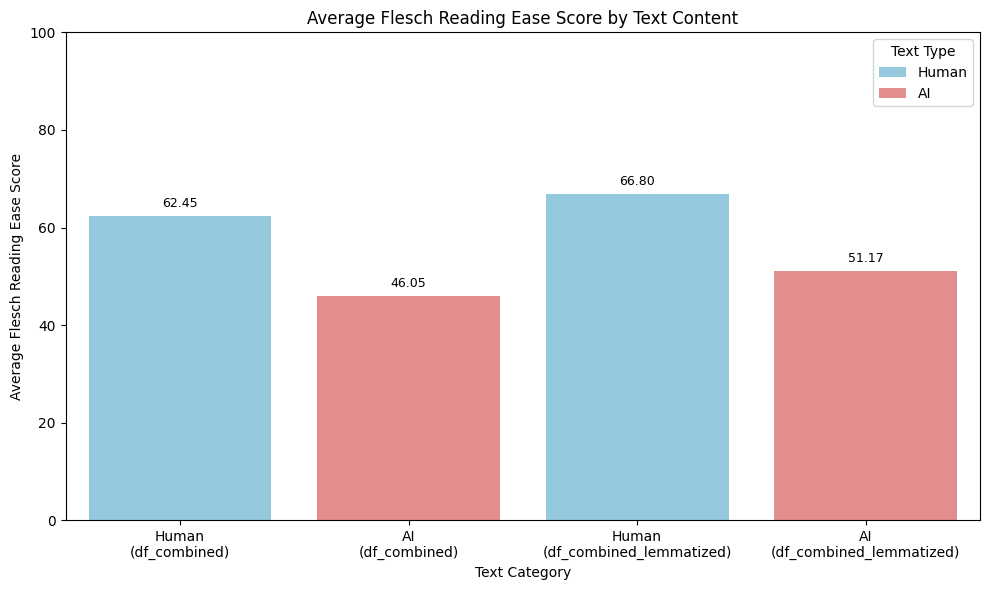

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to hold the average Flesch scores
flesch_data = {
    'Category': [
        'Human\n(df_combined)',
        'AI\n(df_combined)',
        'Human\n(df_combined_lemmatized)',
        'AI\n(df_combined_lemmatized)'
    ],
    'Text Type': [
        'Human',
        'AI',
        'Human',
        'AI'
    ],
    'Processing': [
        'Original',
        'Original',
        'Lemmatized',
        'Lemmatized'
    ],
    'Average Flesch Score': [
        avg_flesch_human_combined,
        avg_flesch_ai_combined,
        avg_flesch_human_lemmatized,
        avg_flesch_ai_lemmatized
    ]
}

df_flesch_scores = pd.DataFrame(flesch_data)

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Average Flesch Score', hue='Text Type', data=df_flesch_scores,
            palette={'Human': 'skyblue', 'AI': 'lightcoral'})

plt.title('Average Flesch Reading Ease Score by Text Content')
plt.xlabel('Text Category')
plt.ylabel('Average Flesch Reading Ease Score')
plt.legend(title='Text Type')
plt.ylim(0, 100) # Flesch scores typically range from 0 to 100

# Add value annotations on top of the bars
for p in ax.patches:
    if p.get_height() > 0: # Only annotate bars with a height greater than 0
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points', fontsize=9)

# Wrap x-tick labels (this will now ensure the \n works correctly)
plt.setp(ax.get_xticklabels(), wrap=True)

plt.tight_layout()
plt.show()

In [28]:
def calculate_ttr(tokens):
    """Calculates the Type-Token Ratio (TTR) for a list of tokens."""
    if not tokens:
        return 0.0
    return len(set(tokens)) / len(tokens)

# Apply the function to df_human_combined
df_human_combined['ttr_score'] = df_human_combined['preprocessed_text'].apply(calculate_ttr)

# Apply the function to df_ai_combined
df_ai_combined['ttr_score'] = df_ai_combined['preprocessed_text'].apply(calculate_ttr)

# Apply the function to df_human_lemmatized
df_human_lemmatized['ttr_score'] = df_human_lemmatized['preprocessed_text'].apply(calculate_ttr)

# Apply the function to df_ai_lemmatized
df_ai_lemmatized['ttr_score'] = df_ai_lemmatized['preprocessed_text'].apply(calculate_ttr)

# Calculate average TTR scores
avg_ttr_human_combined = df_human_combined['ttr_score'].mean()
avg_ttr_ai_combined = df_ai_combined['ttr_score'].mean()
avg_ttr_human_lemmatized = df_human_lemmatized['ttr_score'].mean()
avg_ttr_ai_lemmatized = df_ai_lemmatized['ttr_score'].mean()

# Print the results
print(f"Average TTR (Human Generated, Original Text): {avg_ttr_human_combined:.2f}")
print(f"Average TTR (AI Generated, Original Text): {avg_ttr_ai_combined:.2f}")
print(f"Average TTR (Human Generated, Lemmatized Text): {avg_ttr_human_lemmatized:.2f}")
print(f"Average TTR (AI Generated, Lemmatized Text): {avg_ttr_ai_lemmatized:.2f}")

print("Lexical diversity (TTR) calculated and averages displayed for all categories.")

Average TTR (Human Generated, Original Text): 0.63
Average TTR (AI Generated, Original Text): 0.65
Average TTR (Human Generated, Lemmatized Text): 0.59
Average TTR (AI Generated, Lemmatized Text): 0.61
Lexical diversity (TTR) calculated and averages displayed for all categories.


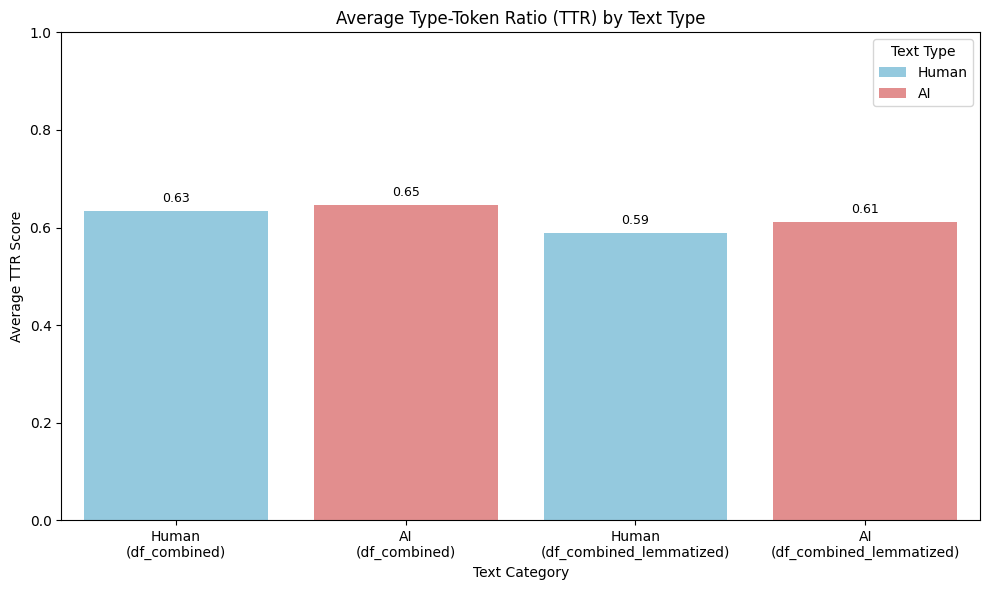

Bar plot showing average TTR scores generated.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ttr_data = {
    'Category': [
        'Human\n(df_combined)',
        'AI\n(df_combined)',
        'Human\n(df_combined_lemmatized)',
        'AI\n(df_combined_lemmatized)'
    ],
    'Text Type': [
        'Human',
        'AI',
        'Human',
        'AI'
    ],
    'Processing': [
        'Original',
        'Original',
        'Lemmatized',
        'Lemmatized'
    ],
    'Average TTR Score': [
        avg_ttr_human_combined,
        avg_ttr_ai_combined,
        avg_ttr_human_lemmatized,
        avg_ttr_ai_lemmatized
    ]
}

df_ttr_scores = pd.DataFrame(ttr_data)

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Average TTR Score', hue='Text Type', data=df_ttr_scores,
            palette={'Human': 'skyblue', 'AI': 'lightcoral'})

plt.title('Average Type-Token Ratio (TTR) by Text Type')
plt.xlabel('Text Category')
plt.ylabel('Average TTR Score')
plt.legend(title='Text Type')
plt.ylim(0, 1) # TTR scores typically range from 0 to 1

# Add value annotations on top of the bars
for p in ax.patches:
    if p.get_height() > 0: # Only annotate bars with a height greater than 0
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

print("Bar plot showing average TTR scores generated.")


*   **Flesch Reading Ease Scores:**
    *   Human-generated texts consistently showed higher readability. Original human texts averaged **62.45** (standard readability), while lemmatized human texts averaged **66.80**.
    *   AI-generated texts were notably more difficult to read. Original AI texts scored an average of **46.05** (difficult readability), and lemmatized AI texts averaged **51.17**.
    *   Lemmatization slightly improved readability for both types of text, but a significant readability gap between human and AI-generated content persisted.
*   **Lexical Diversity (Type-Token Ratio - TTR):**
    *   AI-generated texts generally exhibited slightly higher lexical diversity. Original AI texts had an average TTR of **0.65**, compared to **0.63** for human-generated texts.
    *   For lemmatized texts, AI-generated content maintained a slightly higher TTR at **0.61**, versus **0.59** for human-generated texts.
    *   Lemmatization decreased the TTR for both human and AI texts, as expected, by reducing words to their base forms.
*   **Overall Differences:** AI-generated texts are more difficult to read (lower Flesch score) but show slightly higher lexical diversity (higher TTR) compared to human-generated texts.